In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from math import log, sqrt, exp, pi, cos
from scipy import stats as st
import seaborn as sns
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("Set2"))
sns.set(rc={'figure.figsize':(10,8)}, style="white", color_codes=True)


import warnings
warnings.filterwarnings("ignore")
#Si no tienen la libreria seaborn http://seaborn.pydata.org/installing.html

# Trabajo Prático 1

### Ejercicio 1
Utilizando Matlab, Octave o Python implementar un Generador Congruencial Lineal (GCL) de módulo 
$2^{32}$ , multiplicador 1013904223, incremento de 1664525 y semilla igual a la parte entera del promedio de los números de padrón de los integrantes del grupo.
* Informar los primeros 6 números al azar de la secuencia.
* Modificar el GCL para que devuelva números al azar entre 0 y 1, y realizar un histograma sobre 100.000
valores generados.

In [6]:
m = 2**32 
a = 1013904223
c = 1664525
seed = int((94335 + 93784 + 96626)/3)

# Método Lineal Congruente [Lehmer, 1949]
#U(n) = (a*U(n-1) + c) mod m

Un = {}
Un[0] = seed

def U(n):
    if (n in Un) :
        return Un[n]
    else:
        Un[n] = (a*U(n-1) + c) % m
        return Un[n]

# Primeros 6 Números Aleatorios
for i in range(1,7):
    print(U(i))

1683756394
2988766819
1144704458
3893264899
1949204010
1294472611


In [7]:
#100.000 valores random generados entre 0 y 1
randomNums1 = list()
for i in range(0,100000):
    x = U(i+1)
    randomNums1.insert(i,x/m)

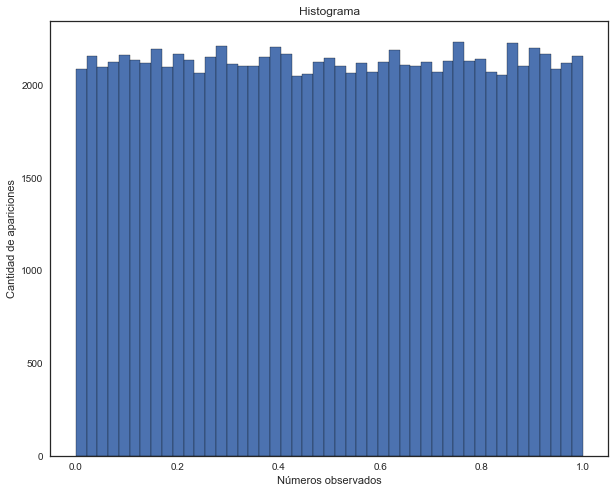

In [8]:
plt.xlabel('Números observados')
plt.ylabel('Cantidad de apariciones')
plt.title('Histograma')

sns.distplot(randomNums1,  kde=False,  hist_kws={'edgecolor':'black', 'alpha':1})
sns.set(style="white", context="talk")

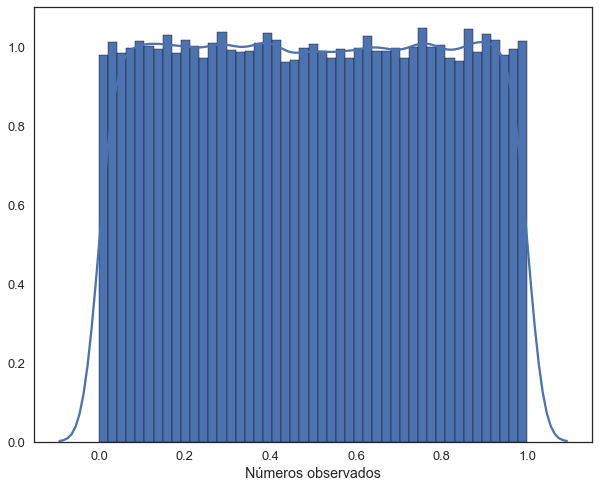

In [9]:
plt.xlabel('Números observados')

sns.distplot(randomNums1,  hist_kws={'edgecolor':'black', 'alpha':1})
sns.set(style="white", context="talk")

### Ejercicio 2
Utilizando el generador de números aleatorios con distribución uniforme [0,1] implementado en el ejercicio 1 y utilizando el método de la transformada inversa genere números pseudoaleatorios con distribución exponencial negativa de media 15.
* Realizar un histograma de 100.000 valores obtenidos.
* Calcular la media, varianza y moda de la distribución obtenida y compararlos con los valores teóricos.

In [10]:
alfa = 1/15
numsExp2 = list()
exp = 0
n = 100000 #Cantidad de muestras

for i in range(0,n):
    exp = (log(1-(randomNums1[i]))/alfa)*(-1)
    numsExp2.insert(i,exp)

unique, counts = np.unique(numsExp2, return_counts=True)

print('Varianza = ' + str(np.var(numsExp2)))
print('Media = ' + str(np.median(numsExp2)))
print('Moda = ' + str(st.mode(numsExp2)[0][0]))

Varianza = 225.9273005825936
Media = 10.379580021900171
Moda = 8.081553818275827e-06


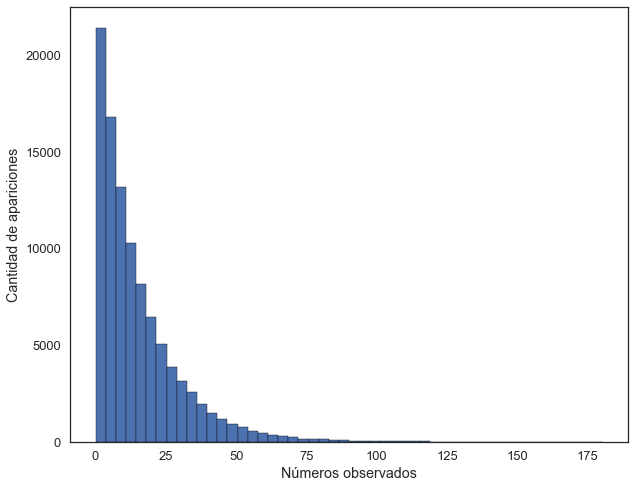

In [11]:
plt.xlabel('Números observados')
plt.ylabel('Cantidad de apariciones')

sns.distplot(numsExp2, kde=False,  hist_kws={'edgecolor':'black', 'alpha':1})
sns.set(style="white", context="talk")

La distribución exponencial es una distribución de probabilidad continua con un parámetro 
$λ>0$
 cuya función de densidad es:
$f(x)= P(x)=\left\{\begin{matrix}
  \lambda e^{-\lambda x} & \quad \text{para } x \ge 0 \\
  0 & \quad \text{en caso contrario}
  \end{matrix}\right.$
  
Y su función de distribución acumulada es:

$  F(x)= P(X \le x)=\left\{\begin{matrix}
  0 & \text{para }x < 0 \\
  1-e^{-\lambda x} & \text{para }x \ge 0
  \end{matrix}\right.$
  
La media se puede calcular como:
  
 $E[X]=\frac{1}{\lambda}$
 
y la varianza como:
 
$ V[X]=\frac{1}{\lambda^2}$

en cuanto la moda para una distribución exponencial siempre es 0.
  
 Para el caso que estamos estudiando: 
 
 $λ = 1/15$
 
 Por lo que teóricamente 
 
 $E[X] = 15,\qquad V[X] = 225$
 
 La media,varianza y moda obtenidas fueron:
 
 $E[X] = 10.379580021900171,\qquad V[X] = 225.9273005825936,\qquad Moda = 8.081553818275827e-06$


### Ejercicio 3
Utilizando el generador de números aleatorios con distribución uniforme [0,1] implementado en el ejercicio 1 genere números pseudoaleatorios con distribución Normal Standard utilizando el método de la transformada inversa (realizando un muestreo de función de distribución acumulada e interpolándolos linealmente).
* Realizar un histograma de 100.000 valores obtenidos.
* Calcular la media, varianza y moda de la distribución obtenida y compararlos con los valores teóricos.


In [21]:
def fNormal(x):
    return (sqrt((2*pi)))**-1 * exp(x**2/-2)

def vNormal(u1, u2):
    return sqrt(-2*log(u1))*cos(u2)

for i in range(0, 10):
    u1 = Un[i]
    u2 = Un[i+1]
    z1 = vNormal(u1/m, u2/m)
    print('Generated u1 = ', u1/m)
    print('Generated u2 = ', u2/m)
    print('Generated z1 = ', z1)


Generated u1 =  2.2099120542407036e-05
Generated u2 =  0.3920300849713385
Generated z1 =  4.279050547748933
Generated u1 =  0.3920300849713385
Generated u2 =  0.6958765021990985
Generated z1 =  1.0503244852519986
Generated u1 =  0.6958765021990985
Generated u2 =  0.266522275749594
Generated z1 =  0.8215003376283143
Generated u1 =  0.266522275749594
Generated u2 =  0.9064713723491877
Generated z1 =  1.0026104662563469
Generated u1 =  0.9064713723491877
Generated u2 =  0.45383442426100373
Generated z1 =  0.3983009712245387
Generated u1 =  0.45383442426100373
Generated u2 =  0.3013928912114352
Generated z1 =  1.2003381341481054
Generated u1 =  0.3013928912114352
Generated u2 =  0.1818412863649428
Generated z1 =  1.5232321342099513
Generated u1 =  0.1818412863649428
Generated u2 =  0.16155536542646587
Generated z1 =  1.822369837530805
Generated u1 =  0.16155536542646587
Generated u2 =  0.25458949292078614
Generated z1 =  1.8478554760676276
Generated u1 =  0.25458949292078614
Generated u2 =

Los valores teóricos son: 

$E[x]= ,\qquad V[x]= ,\qquad Moda=$ 

Los valores obtenidos son: 

$E[x]= ,\qquad V[x]= ,\qquad Moda=$ 



### Ejercicio 4
Genere 100.000 números aleatorios con distribución Normal de media 35 y desvío estándar 5 utilizando el algoritmo de Aceptación y Rechazo.
* Realizar un histograma con todos los valores obtenidos.
* Comparar, en el mismo gráfico, el histograma realizado en el punto anterior con la distribución normal brindada por Matlab u Octave.
* Calcular la media, varianza y moda de la distribución obtenida y compararlos con los valores teóricos.

In [22]:
c = sqrt((2*exp(1)/pi))

#N MUESTRAS EXPONENCIALES DE MEDIA 1
n = 100000
numsExp4 = list()
probabilidadDeAceptar = list()
numsGauss = list() #VALORES ACEPTADOS COMO GAUSSIANOS

#NORMAL DE MEDIA 35 Y VARIANZA 25
def normal(x):
    return ((exp(-0.5*(((x-35)/5)**2)))/sqrt(50*pi))

#PROBABILIDAD DE ACPTAR EL VALOR GENERADO
def prob(x):
    return (normal(x)/(c*exp(-x)))

#MUESTRAS DE EXPONENCIALES DE MEDIA 1 Y SE GENERA UN VECTOR DE PROBABILIDADES
#DE ACEPTAR CADA VALOR GENERADO
for i in range(0,n):
    t = np.random.exponential(1)
    numsExp4.insert(i, t)
    probabilidadDeAceptar.insert(i,prob(t))

for i in range(0,n):
    r = np.random.uniform()

    if r > probabilidadDeAceptar[i]:
        r2 = np.random.uniform()
        if r2 < 0.5:
            numsGauss.insert(i,numsExp4[i])
        else:
            numsGauss.insert(i,numsExp4[i]*(-1))

print('Porcentaje de rechazo = ' + str((n-len(numsGauss))/n))
print('Varianza = ' + str(np.var(numsGauss)))
print('Media = ' + str(np.median(numsGauss)))
print('Moda = ' + str(st.mode(numsGauss)[0][0]))

Porcentaje de rechazo = 0.0
Varianza = 1.9971173796885828
Media = 0.006259804555639776
Moda = -10.3221358635726


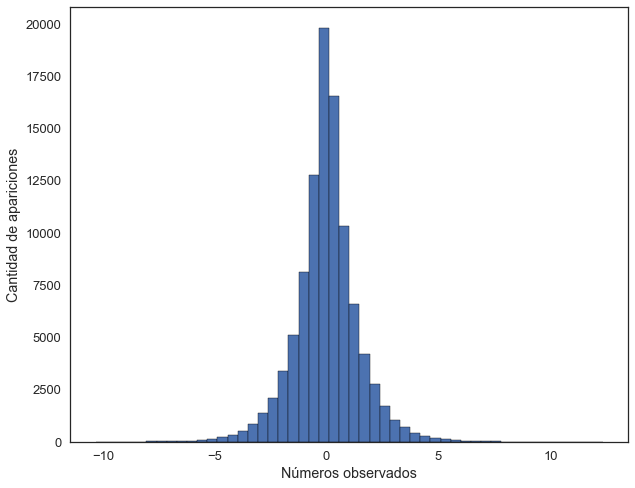

In [23]:
plt.xlabel('Números observados')
plt.ylabel('Cantidad de apariciones')

sns.distplot(numsGauss, kde=False,  hist_kws={'edgecolor':'black', 'alpha':1})
sns.set(style="white", context="talk")


Comparar, en el mismo gráfico, el histograma realizado en el punto anterior con la distribución normal brindada por Matlab u Octave.

Los valores teóricos son: 

$E[x]= ,\qquad V[x]= ,\qquad Moda=$ 

Los valores obtenidos son: 

$E[x]= ,\qquad V[x]= ,\qquad Moda=$ 


### Ejercicio 5
Utilizando el método de la transformada inversa y utilizando el generador de números aleatorios implementado en el ejercicio 1 genere números aleatorios siguiendo la siguiente función de distribución de probabilidad empírica.

| Probabilidad | Valor generado |
| --- | --- |
| 0.5 | 1 |
| 0.2 | 2 |
| 0.1 | 3 |
| 0.2 | 4 |


In [24]:
def convertToFixedNumber(u):
  if (u <= .5):
    return 1
  elif (u > .5 and u <= .7):
    return 2
  elif (u > .7 and u <= .8):
    return 3
  elif (u > .8 and u <= 1):
    return 4

nums5 = list()
for i in range(100000):
    nums5.append(convertToFixedNumber(Un[i]/m))

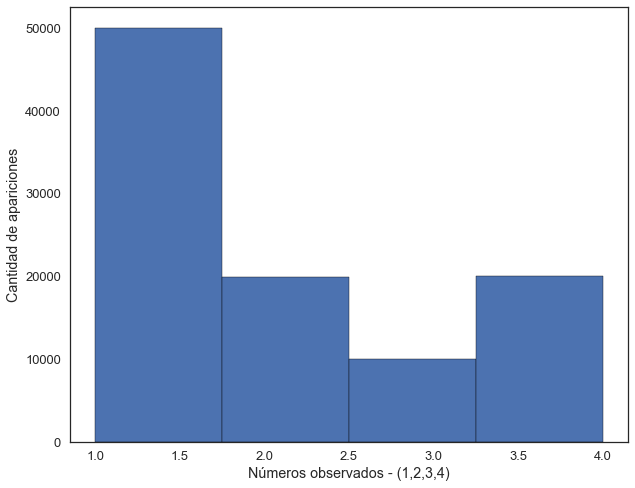

In [25]:
plt.xlabel('Números observados - (1,2,3,4)')
plt.ylabel('Cantidad de apariciones')
sns.distplot(nums5,  kde=False, bins=4,
                  hist_kws={'edgecolor':'black', 'alpha':1})
sns.set(style="white")

En el gráfico anterior se puede distinguir el comportamiento esperado. 
Tomamos 100k muestras en las cuales, aproximadamente obtuvimos:

1 en 50k muestras$  ,\qquad P(1) \approx 0.5$.

2 en 20k muestras  $  ,\qquad P(2) \approx 0.2$.

3 en 10k muestras  $  ,\qquad P(3) \approx 0.1$.

4 en 20k muestras  $  ,\qquad P(4) \approx 0.2$.

### Ejercicio 6
Considerar el siguiente experimento:
Lanzar una moneda tantas veces como sea necesario hasta obtener cara.
Realizar el experimento 10000 veces indicando:
* ¿A qué tipo de proceso corresponde cada uno de los lanzamientos?
* Con qué distribución conocida se puede modelar cada uno de los experimentos.
* Realizar un histograma mostrando la distribución obtenida

In [26]:
nums6 = list()
for i in range(0,10000):
    nums6.insert(i,np.random.geometric(0.5))

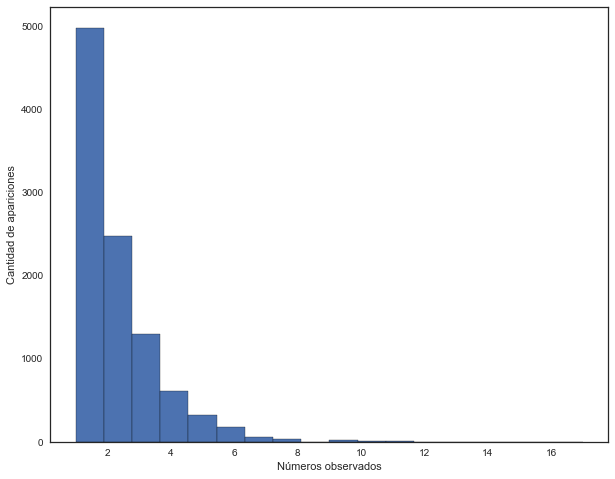

In [27]:
plt.xlabel('Números observados')
plt.ylabel('Cantidad de apariciones')

sns.distplot(nums6, kde=False, bins=18, hist_kws={'edgecolor':'black', 'alpha':1})
sns.set(style="white", context="talk")

Cada uno de los lanzamientos corresponde al tipo de proceso ...

Cada uno de los experimentos se pueden modelar con una distribución ...

### Ejercicio 7
Realizar, sólo gráficamente, un test espectral en 2 y 3 dimensiones al generador conguencial lineal implementado en el ejercicio 1. ¿Cómo se distribuyen espacialmente los puntos obtenidos?

In [28]:
xs = []
ys = []
for i in range(0,100000-1):
    xs.append(Un[i]/m)
    ys.append(Un[i+1]/m)

xs3d = []
ys3d = []
zs3d = []
for i in range(0,100000-2):
    xs3d.append(Un[i]/m)
    ys3d.append(Un[i+1]/m)
    zs3d.append(Un[i+2]/m)

Text(0.5,1,'Test espectral en 2 dimensiones')

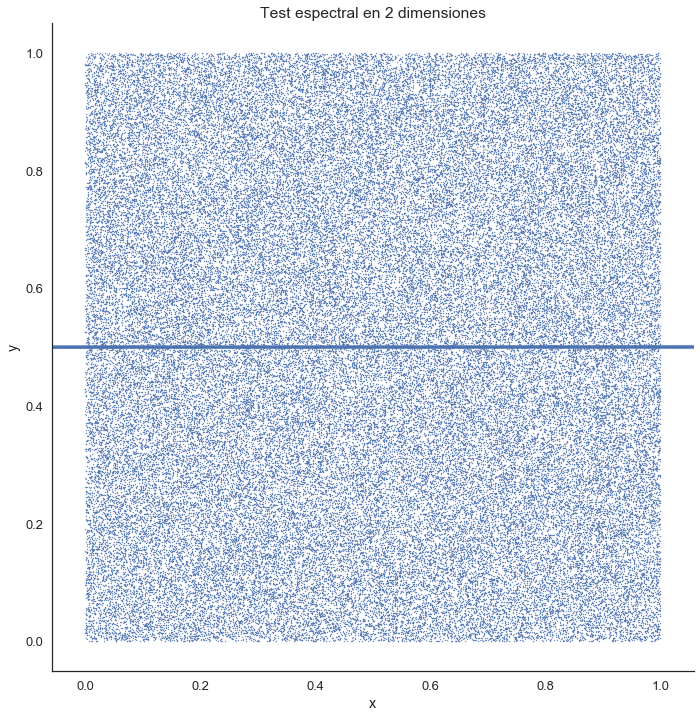

In [29]:
df=pd.DataFrame({'x': xs, 'y': ys })
sns.lmplot('x', 
           'y', 
           data=df,
           size=10, scatter_kws={"marker": "D", "s": 2}
          )

plt.title("Test espectral en 2 dimensiones")

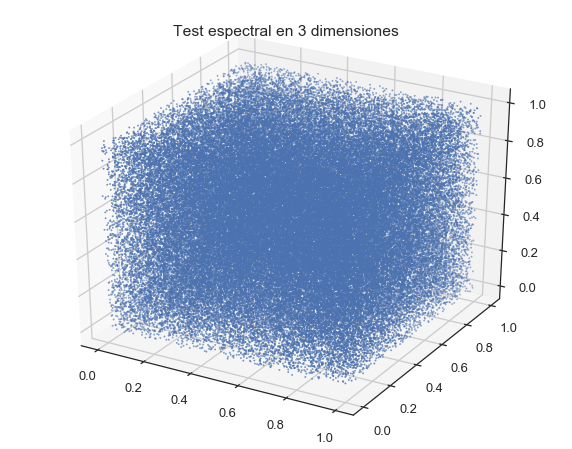

In [30]:
from mpl_toolkits.mplot3d import Axes3D

df=pd.DataFrame({'X': xs3d, 'Y': ys3d, 'Z': zs3d})
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'],  s=2)
plt.title("Test espectral en 3 dimensiones")
plt.show()

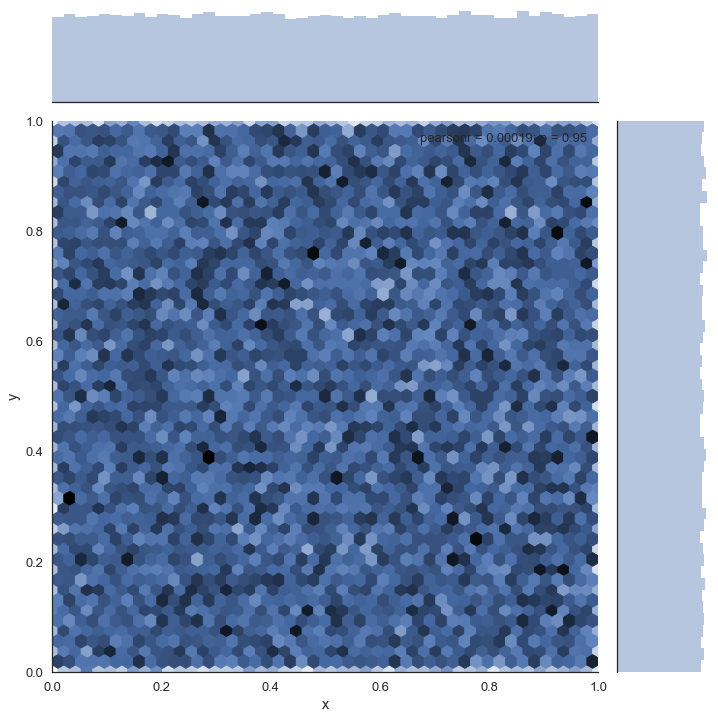

In [31]:
sns.jointplot(np.array(xs),  np.array(ys), kind="hex", size=10).set_axis_labels("x", "y")

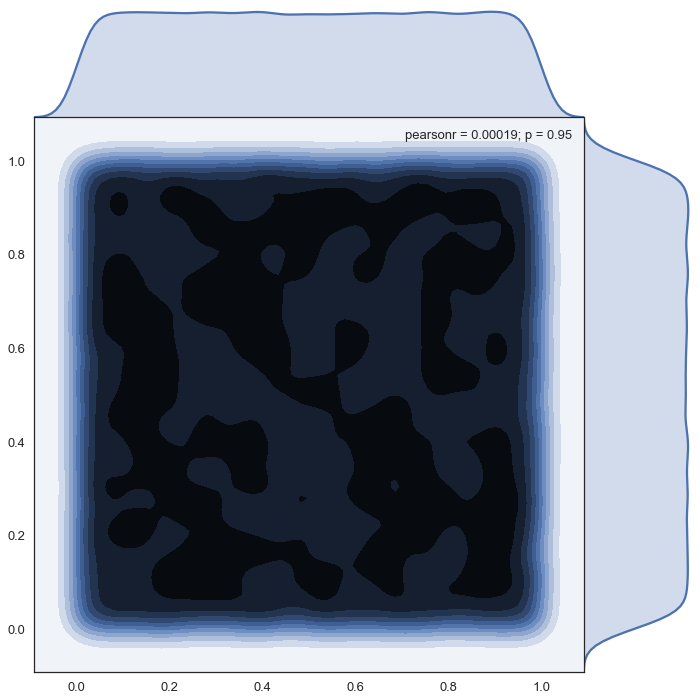

In [32]:
sns.jointplot(np.array(xs),  np.array(ys), kind="kde",size=10, space=0, color="b")

Los gráficos anteriores se realizaron para detectar patrones. No identificamos patrones claros en la distrubución espacial de los puntos. Lo que implicaría que son números realmente aleatorios

### Ejercicio 8
Realizar un test Chi 2 a la distribución empírica implementada en el Ej 6. Analizar el resultado para un nivel de significación 0,01.

In [55]:
n = 10000

d2 = 0

valores, ocurrencias = np.unique(nums6, return_counts=True)

k = len(valores) #CANTIDAD DE VALORES DIFERENTES 
pi = 1/k #PROBABILIDAD ESPERADA

for i in range(0,k):
    d2 += ((ocurrencias[i] - n*(pi))**2)/(n*(pi))
    
print('Moda = ' + str(st.mode(nums6)[0][0]))
print('Valores obtenidos: ' + str(valores))
print('Cantidad de valores obtenidos diferentes: ' + str(k))
print('D2 = ' + str(d2))

Moda = 1
Valores obtenidos: [ 1  2  3  4  5  6  7  8  9 10 11 14 17]
Cantidad de valores obtenidos diferentes: 13
D2 = 33099.901


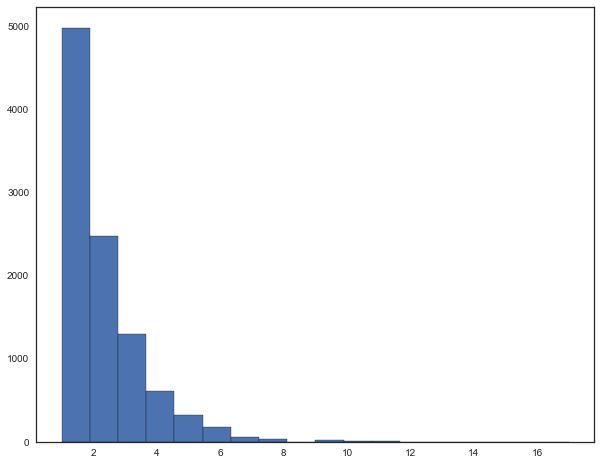

In [46]:
sns.distplot(nums6,  kde=False, bins=18,
                  hist_kws={'edgecolor':'black', 'alpha':1})
sns.set(style="white")

Primero medimos la dispersión de las ocurrencias observadas $N_{i}$ respecto de las esperadas ( $np_{i}$ ):

<h3 align="center">$
D^{2} = \sum_{k=1}^{K-1}\frac {(N_{i} - np_{i})^{2}}{np_{i}}
$</h3> 


**Pearson** (1900) demostró que $D^{2}$ responde a una distribución de tipo $Chi^{2}$, por lo tanto, encontramos $\textbf{t}$ tal que  $P(D^{2} > t) = \alpha$  y aceptamos la hipótesis siempre que $D^{2} < t$.

Encontramos que nuestro $D^{2} = 33099.901$  .

Con un nivel de significación de $1\%$, $\alpha = 0.01$, y una cantidad de diferentes valores k, $k=13$, buscamos en la tabla $Chi^{2}$ guiándonos por  $\alpha = 0.01$ y grados de libertad  $v = k-1 = 12 $,  tenemos  $t = 26.2$.

Como $D^{2} > t$, entonces **rechazamos la hipótesis** diciendo que los datos no responden a una distribución uniforme, considerando un error del $1\%$.

![Tabla Chi2](chi2.png)

### Ejercicio 9
Al generador congruencial lineal implementado en el ejercicio 1 realizarle un gap test para los siguientes intervalos:

| Intervalo 1 | Intervalo 2  |
|--|
| 0.2 - 0.6 | 0.5 - 1|

Analizar los resultados con un nivel de significación del 5%.

Gap Test: Siendo Ui un número aleatorio con distribución uniforme en un rango [0,1] y 0<=α < β <= 1. Este test consiste en contar la cantidad de números aleatorios generados de forma consecutiva entre la generación de un número que pertenece al intervalo [α,β] y el próximo número generado que vuelve a pertenecer al intervalo.

Entendemos como gap al espacio entre dos apariciones consecutivas de números pertenecientes al intervalo $[\alpha, \beta]$.

La probabilidad teórica de apariciones de tamaño de gaps es:

$P(tamañoDeGap = 0) = p = \beta - \alpha $ 

$P(tamañoDeGap = 1) = p(1-p)$

...

$P(tamañoDeGap = t) = p(1-p)ˆt$

La distribución de frecuencia teórica es:

$ P(tamañoDeGap \leq t) = F(t) = p\sum_{n=1}^{t} (1-p)^{n} = 1-(1-p)^{t+1}$




Tomamos:

$\alpha=0.2,\qquad  \beta=0.6$

y queremos analizar un total de 100 gaps.

In [56]:
def perteneceAlIntervalo(num, alpha, beta):
    return (num>=alpha and num<=beta)

def encontrarGaps(n, alpha, beta):
    oneSeen = False
    gapTamanio = 0
    gaps = list()
    i=0
    while(len(gaps) <= 100):
        if(not perteneceAlIntervalo(Un[i]/m, alpha, beta)): 
            gapTamanio+=1
        if (perteneceAlIntervalo(Un[i]/m, alpha, beta) and oneSeen == 0):
            oneSeen = True
        if (perteneceAlIntervalo(Un[i]/m, alpha, beta) and oneSeen):
            gaps.append(gapTamanio)            
            if (not perteneceAlIntervalo(Un[i-1]/m, alpha, beta)):
                gapTamanio = 0
        i+=1
    gaps = gaps[1:] 
    return gaps

gaps = encontrarGaps(100,0.2,0.6)
tamaniosGaps, ocurrencias = np.unique(gaps, return_counts=True) 

print("Gaps encontrados: " +  str(len(gaps)))
print("Tipos de gaps encontrados: "+ str(len(tamaniosGaps)))
print(tamaniosGaps)
print("Frecuencia: ")
print(ocurrencias)

Gaps encontrados: 100
Tipos de gaps encontrados: 9
[ 0  1  2  3  4  5  6  7 10]
Frecuencia: 
[36 29 14 10  6  2  1  1  1]


Para 100 gaps encontrados:

| Tamaño de gap | Apariciones  | Probabilidad Obtenida | Probabilidad Teórica 
|--|
| 0 | 36| 0.36 |0.4|
| 1 | 29| 0.29|0.24|
| 2 | 14 | 0.14|0.144|
| 3 | 10| 0.1|0.0864|
| 4 | 6| 0.06|0.0518|
| 5 | 2| 0.02|0.0311|
| 6 | 1| 0.01|0.0187|
| 7 | 1| 0.01|0.0112|
| 10 | 1| 0.01|0.0024|

Ahora realizamos el test Chi 2 para los datos obtenidos en el gap test:

Primero medimos la dispersión de las ocurrencias observadas $N_{i}$ respecto de las esperadas ( $np_{i}$ ):

<h3 align="center">$
D^{2} = \sum_{k=1}^{K-1}\frac {(N_{i} - np_{i})^{2}}{np_{i}}
$</h3> 



In [57]:
d2 = 0
tamanioFrecuencia = dict(zip(tamaniosGaps, ocurrencias)) 
pi = {0 : 0.4,
      1 : 0.24,
      2 : 0.144,
      3 : 0.0864,
      4 : 0.0518,
      5 : 0.0311,
      6 : 0.0187,
      7 : 0.0112,
      10 : 0.0024}
n = 100

for key in tamanioFrecuencia:
    d2 += ((tamanioFrecuencia[key] - n*(pi[key]))**2)/(n*(pi[key]))

print('D2 = ' + str(d2))

D2 = 5.017115602911896


Siguiendo lo desarrollado en el ejercicio 8

Encontramos que nuestro $D^{2} = 5.017115602911896$  .

Con un nivel de significación del $5\%$, $\alpha = 0.05$, y una cantidad de diferentes valores k, $k=9$, buscamos en la tabla $Chi^{2}$ guiándonos por  $\alpha = 0.05$ y grados de libertad  $v = k-1 = 8 $,  tenemos  $t = 2,7$.

Como $D^{2} > t$, entonces **rechazamos la hipótesis** diciendo que los datos no responden a una distribución uniforme, considerando un error del $5\%$.

Tomamos:

$\alpha=0.5,\qquad  \beta=1$

y queremos analizar un total de 100 gaps.

In [58]:
gaps = encontrarGaps(100,0.5,1)
tamaniosGaps, ocurrencias = np.unique(gaps, return_counts=True) 

print("Gaps encontrados: " +  str(len(gaps)))
print("Tipos de gaps encontrados: "+ str(len(tamaniosGaps)))
print(tamaniosGaps)
print("Frecuencia: ")
print(ocurrencias)

Gaps encontrados: 100
Tipos de gaps encontrados: 9
[0 1 2 3 4 5 7 8 9]
Frecuencia: 
[47 31 10  5  2  2  1  1  1]


Para 100 gaps encontrados:

| Tamaño de gap | Apariciones  | Probabilidad Obtenida | Probabilidad Teórica 
|--|
| 0 | 47| 0.47 |0.5|
| 1 | 31| 0.31|0.25|
| 2 | 10 | 0.1|0.125|
| 3 | 5| 0.05|0.0625|
| 4 | 2| 0.02|0.0312|
| 5 | 2| 0.02|0.0156|
| 7 | 1| 0.01|0.0039|
| 8 | 1| 0.01|0.0019|
| 9 | 1| 0.01|0.0010|


Ahora realizamos el test Chi 2 para los datos obtenidos en el gap test:




In [59]:
d2 = 0
tamanioFrecuencia = dict(zip(tamaniosGaps, ocurrencias)) 
pi = {0 : 0.5,
      1 : 0.25,
      2 : 0.125,
      3 : 0.0625,
      4 : 0.0312,
      5 : 0.0156,
      7 : 0.0039,
      8 : 0.0019,
      9 : 0.0010}
n = 100

for key in tamanioFrecuencia:
    d2 += ((tamanioFrecuencia[key] - n*(pi[key]))**2)/(n*(pi[key]))

print('D2 = ' + str(d2))

D2 = 15.403414304993253


Encontramos que nuestro $D^{2} = 15.403414304993253$  .

Con un nivel de significación del $5\%$, $\alpha = 0.05$, y una cantidad de diferentes valores k, $k=9$, buscamos en la tabla $Chi^{2}$ guiándonos por  $\alpha = 0.05$ y grados de libertad  $v = k-1 = 8 $,  tenemos  $t = 2,7$.

Como $D^{2} > t$, entonces **rechazamos la hipótesis** diciendo que los datos no responden a una distribución uniforme, considerando un error del $5\%$.

### Ejercicio 10
Aplicar el test de Kolmogorov-Smirnov al generador de números al azar con distribución normal generado en el ejercicio 4, y analizar el resultado del mismo para un nivel de significación 0,01.

Graficar la distribución acumulada real versus la distribución empírica.

In [ ]:
data = [go.Histogram(x=numsExp4)]
layout = go.Layout(
    title='Distribución de los numeros aleatorios obtenidos',
    xaxis=dict(
        title='Numeros obtenidos'
    ),
    yaxis=dict(
        title='Cantidad de apariciones'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styled histogram')